# Импорт необходимых библиотек

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Загрузка данных

In [2]:
# Загрузим данные из файла ga_sessions.pkl и сохраним в датафрейм df_sessions
with open('data/ga_sessions.pkl', 'rb') as file:
    df_sessions = pickle.load(file)


In [3]:
print(f'Размер датафрейма: {df_sessions.shape}')   # Выведем размер датафрейма
df_sessions.head()                                 # Выведем первые 5 строк датафрейма

Размер датафрейма: (1860042, 18)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [4]:
# Загрузим данные из файла ga_hits.pkl и сохраним в датафрейм df_hits
with open('data/ga_hits.pkl', 'rb') as file:
    df_hits = pickle.load(file)

In [5]:
print(f'Размер датафрейма: {df_hits.shape}')   # Выведем размер датафрейма
df_hits.head()                                 # Выведем первые 5 строк датафрейма

Размер датафрейма: (15726470, 11)


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,None
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,None
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,None
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,None
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,None


# Добавление признака target

Для обучения модели нужно добавить в датасет df_sessions признак target - совершил ли пользователь целевое действие или нет. Эти данные можно получить из датафрейма df_hits.

In [6]:
df_new = df_sessions.copy()    #Скопируем датафрейм df_sessions в df_new
df_new.shape

(1860042, 18)

In [7]:
# Создадим датафрейм df_hits_new в котором будут содержаться только ID сессий и event_action
df_hits_new = df_hits.drop(['hit_date', 'hit_time', 'hit_number', 'hit_type', 'hit_referer', 'hit_page_path', 'event_category', 'event_label', 'event_value'], axis = 1)

print(df_hits_new.shape)
df_hits_new.head()

(15726470, 2)


,session_id,event_action
0,5639623078712724064.1640254056.1640254056,quiz_show
1,7750352294969115059.1640271109.1640271109,quiz_show
2,885342191847998240.1640235807.1640235807,quiz_show
3,142526202120934167.1640211014.1640211014,quiz_show
4,3450086108837475701.1640265078.1640265078,quiz_show


In [8]:
# target_action - список целевых действий
target_action = ['sub_car_claim_click', 
                'sub_car_claim_submit_click', 
                'sub_open_dialog_click', 
                'sub_custom_question_submit_click', 
                'sub_call_number_click',
                'sub_callback_submit_click', 
                'sub_submit_success',
                'sub_car_request_submit_click']

In [9]:
# Оставим в df_hits_new только информацию о сессиях, в которых было совершенно целевое действие
df_hits_new = df_hits_new[df_hits_new['event_action'].isin(target_action)]

print(df_hits_new.shape)
df_hits_new.head()

(104908, 2)


,session_id,event_action
4016,2744563715298057088.1640258436.1640258436,sub_submit_success
4045,3087297479839089634.1640268774.1640268774,sub_submit_success
4046,3156966333326004302.1640206419.1640206800,sub_submit_success
4047,3750243879753098158.1640272208.1640272208,sub_submit_success
4048,7518333712042258254.1640258901.1640258901,sub_submit_success


In [10]:
df_hits_new.session_id.nunique()    # Количество уникальных session_id в df_hits_new

50760

In [11]:
# Оставим в df_hits_new только две колонки - ID сессии и target = 1 (обозначает, что в этой сессии было совершено целевое действие)
df_hits_new['target'] = 1
df_hits_new = df_hits_new.drop(['event_action'], axis = 1)
df_hits_new = df_hits_new.drop_duplicates()
print(df_hits_new.shape)
df_hits_new.head()

(50760, 2)


,session_id,target
4016,2744563715298057088.1640258436.1640258436,1
4045,3087297479839089634.1640268774.1640268774,1
4046,3156966333326004302.1640206419.1640206800,1
4047,3750243879753098158.1640272208.1640272208,1
4048,7518333712042258254.1640258901.1640258901,1


In [12]:
# Объединим датафреймы df_hits_new и df_new

df_full = pd.merge(left = df_new, right = df_hits_new, on = 'session_id', how = 'outer')
df_full = df_full[~(df_full['client_id'].isna())]  # Удаляем получившиеся в результате объединения строки, в которых только два непустых значения - target и session_id
df_full['target'] = df_full['target'].fillna(0)    # Заменяем пропуски в столбце target на 0 (целевое действие совершено не было)
print(df_full.shape)
df_full.head()

(1860042, 19)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0.0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0.0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0.0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1.0,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2.0,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0


In [13]:
df_full.to_csv('data/df_full.csv', index=False)

# Изучение данных df_full

In [14]:
df_full.info()      # Информация о df_sessions

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860042 entries, 0 to 1860041
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   client_id                 object 
 2   visit_date                object 
 3   visit_time                object 
 4   visit_number              float64
 5   utm_source                object 
 6   utm_medium                object 
 7   utm_campaign              object 
 8   utm_adcontent             object 
 9   utm_keyword               object 
 10  device_category           object 
 11  device_os                 object 
 12  device_brand              object 
 13  device_model              object 
 14  device_screen_resolution  object 
 15  device_browser            object 
 16  geo_country               object 
 17  geo_city                  object 
 18  target                    float64
dtypes: float64(2), object(17)
memory usage: 283.8+ MB


In [15]:
missing_values = ((df_full.isna().sum()/len(df_full)) * 100).sort_values(ascending = False)    # Вычислим процент пропусков в колонках df_sessions
missing_values

device_model                99.121633
utm_keyword                 58.174009
device_os                   57.533002
utm_adcontent               18.043410
utm_campaign                11.806346
device_brand                 6.380394
utm_source                   0.005215
geo_city                     0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
session_id                   0.000000
device_category              0.000000
client_id                    0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
target                       0.000000
dtype: float64

In [16]:
def print_useful_rows_info(df):                                             # Функция для проверки количества полностью заполненных значений в датафрейме
    print('Количество полностью заполненных объектов:', len(df.dropna()))
    print('Процент полностью заполненных объектов:', round(((len(df.dropna()))/len(df) * 100), 2))

In [17]:
print_useful_rows_info(df_full)

Количество полностью заполненных объектов: 14940
Процент полностью заполненных объектов: 0.8


In [18]:
df_full.nunique()  # Выведем количество уникальных значений в колонках

session_id                  1860042
client_id                   1391719
visit_date                      226
visit_time                    85318
visit_number                    537
utm_source                      293
utm_medium                       56
utm_campaign                    412
utm_adcontent                   286
utm_keyword                    1219
device_category                   3
device_os                        13
device_brand                    206
device_model                    104
device_screen_resolution       5039
device_browser                   57
geo_country                     166
geo_city                       2548
target                            2
dtype: int64

## Data preparation

### Дубликаты

In [19]:
df_full[df_full.duplicated()]       # Проверка на дубликаты. Результат: дубликаты отсутствуют

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target


### Пропуски

#### Пропуски в device_model

In [20]:
df_full.device_model.describe()     # Описание колонки device_model

count                    16338
unique                     104
top       AuMdmADEIoPXiWpTsBEj
freq                      9778
Name: device_model, dtype: object

In [21]:
df_clean = df_full.drop(['device_model'], axis=1)  # Так как признак device_model содержит 99% пропусков, которые невозможно восстановить из остального датасета, удалим этот признак
df_clean.shape

(1860042, 18)

In [22]:
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов: 578427
Процент полностью заполненных объектов: 31.1


#### Пропуски в utm_keyword 

In [23]:
df_clean.utm_keyword.describe()    # Описание колонки utm_keyword

count                   777981
unique                    1219
top       puhZPIYqKXeFPaUviSjo
freq                    506819
Name: utm_keyword, dtype: object

In [24]:
dict(df_clean.utm_keyword.value_counts(dropna=False)) #Посмотрим на список уникальных значений

{nan: 1082061,
 'puhZPIYqKXeFPaUviSjo': 506819,
 'aXQzDWsJuGXeBXexNHjc': 24241,
 'pHqgLcdBQPSLcrTpLkdr': 13767,
 'ITfrGJNwVsHBGJMAKoct': 13353,
 'hAmNSZmQkKQKAjZEGlgb': 11297,
 'UKNBOHebRIIsQRsjNKay': 10946,
 'IGUCNvHlhfHpROGclCit': 7568,
 'RkpOyeEPgcMBSDuHLQcj': 6978,
 'JajANoFxoqXfKRNBUhzx': 6758,
 'BmOOOIoWGHEfxEfoUezs': 6602,
 'ZNhSIPchlbnKwZWcsKzz': 5661,
 'pucKZkLDtpMDBTobJAJG': 5391,
 'RrhnkuoaqckNtJpAZDzH': 5004,
 'YQXPpoLsxnykCWKhGEmI': 4874,
 'DBHgBJHOdbPwsRDUbEgX': 4472,
 'tVtbIKrPSOvrXLCznVVe': 3711,
 'XEayFbemrPYbxFeNbxif': 3695,
 'MWLEpQPyjGkjHseVyeyQ': 3156,
 'fzbotReoFzSuckjwcpCs': 2965,
 'COtBsnAzfZyRVtvDlhnW': 2785,
 'tzIeQUUHahhBuEkJqDVp': 2699,
 'QYfbqJXuLdJGfOSFgZOs': 2674,
 'KCcEkEaKEtUilBVMoCAi': 2637,
 'ISrKoXQCxqqYvAZICvjs': 2559,
 'psjAUzFZVWWCuxgCrtmQ': 2546,
 'qxnAydKMtMSuafVrMzdC': 2539,
 'ObIWuFTMgFPUHNiFoOwb': 2491,
 'MBHgRPNeTcONuVFFXgmz': 2476,
 'oKjXDUsycmahkgMhGdAR': 2387,
 'qUcotcWimEOQiboVPcCx': 2385,
 'jfLxUKobDdJlutbwyjaU': 2367,
 'fkhLOTqvIJxkHks

In [25]:
df_clean = df_clean.drop(['utm_keyword'], axis=1)  # Так как признак keyword содержит >50% пропусков, которые невозможно восстановить из остального датасета, удалим этот признак
df_clean.shape

(1860042, 17)

#### Пропуски в device_os

In [26]:
df_clean.device_os.describe()  # Описание device_os. Видно что признак содержит немного уникальных значений - всего 13.

count      789904
unique         13
top       Android
freq       464054
Name: device_os, dtype: object

In [27]:
df_clean.device_os.value_counts(dropna=False)

None             1070138
Android           464054
iOS               207104
Windows            88307
Macintosh          24824
Linux               5120
(not set)            364
Chrome OS             83
BlackBerry            27
Tizen                  7
Samsung                4
Windows Phone          4
Firefox OS             3
Nokia                  3
Name: device_os, dtype: int64

In [28]:
dict(df_clean.device_brand.value_counts())

{'Apple': 551088,
 'Samsung': 332194,
 'Xiaomi': 288367,
 '': 248500,
 'Huawei': 185853,
 'Realme': 19058,
 '(not set)': 17545,
 'OPPO': 13504,
 'Vivo': 11740,
 'OnePlus': 9965,
 'Asus': 7929,
 'Nokia': 7285,
 'Sony': 6459,
 'ZTE': 6365,
 'Google': 5150,
 'Meizu': 3750,
 'Lenovo': 3148,
 'Blackview': 2759,
 'Tecno': 2654,
 'LG': 2447,
 'Motorola': 2357,
 'BQ': 1573,
 'itel': 1082,
 'Alcatel': 968,
 'DOOGEE': 876,
 'Oukitel': 826,
 'HTC': 790,
 'Umidigi': 661,
 'Ulefone': 511,
 'Infinix': 417,
 'Vsmart': 368,
 'LeEco': 344,
 'BlackBerry': 338,
 'Cubot': 320,
 'Philips': 299,
 'Mozilla': 295,
 'POCO': 229,
 'Sharp': 226,
 'Vertex': 198,
 'TP-Link': 194,
 'DEXP': 190,
 'Prestigio': 171,
 'Leagoo': 161,
 'Micromax': 143,
 'Wileyfox': 137,
 'Neffos': 135,
 'Inoi': 112,
 'Hisense': 103,
 'TCL': 91,
 'HOMTOM': 81,
 'CAT': 76,
 'Karbonn': 72,
 'Highscreen': 64,
 'LeTV': 64,
 'Acer': 53,
 'Coolpad': 49,
 'AGM': 49,
 'Haier': 43,
 'Fly': 37,
 'Black Fox': 36,
 'Mito': 34,
 'Chuwi': 34,
 'Vernee'

In [29]:
# Заполним пропуски в колонке device_os для брендов 'Apple', 'Samsung', 'Xiaomi', 'Huawei' самым часто встречающимся значением по этой группе
popular_brands = ['Apple', 'Samsung', 'Xiaomi', 'Huawei']

In [30]:
for brand in popular_brands:
    df_clean.loc[(df_clean['device_brand'] == brand), 'device_os'] = df_clean.loc[(df_clean['device_brand'] == brand), 'device_os'].fillna(df_clean.loc[(df_clean['device_brand'] == brand), 'device_os'].mode()[0]) 

In [31]:
# Заполним пропуски в колонке device_os для броузеров 'Chrome', 'YaBrowser', "Edge", 'Firefox', 'Opera', 'Safari' самым часто встречающимся значением по этой группе
popular_browsers = ['Chrome', 'YaBrowser', "Edge", 'Firefox', 'Opera', 'Safari']

In [32]:
for browser in popular_browsers:
    df_clean.loc[(df_clean['device_browser'] == browser), 'device_os'] = df_clean.loc[(df_clean['device_browser'] == browser), 'device_os'].fillna(df_clean.loc[(df_clean['device_browser'] == browser), 'device_os'].mode()[0])

In [33]:
# Вырежем из датафрейма все строки с пропусками в device_os, которые не удалось заполнить
df_clean = df_clean[~(df_clean.device_os.isna())]

In [34]:
print('Количество пропусков в device_os:',df_clean.device_os.isna().sum())

Количество пропусков в device_os: 0


In [35]:
print('Размер датафрейма:', df_clean.shape)

Размер датафрейма: (1853357, 17)


In [36]:
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов: 1410136
Процент полностью заполненных объектов: 76.09


In [37]:
df_clean.device_os.value_counts()

Android          1135554
iOS               578545
Windows           108819
Macintosh          24824
Linux               5120
(not set)            364
Chrome OS             83
BlackBerry            27
Tizen                  7
Samsung                4
Windows Phone          4
Firefox OS             3
Nokia                  3
Name: device_os, dtype: int64

#### Пропуски в device_brand

In [38]:
missing_values_1 = ((df_clean.isna().sum()/len(df_clean)) * 100).sort_values(ascending = False)    # Вычислим еще разпроцент пропусков в колонках df_clean
missing_values_1

utm_adcontent               18.015579
utm_campaign                11.829939
device_brand                 6.403407
utm_source                   0.005234
device_os                    0.000000
geo_city                     0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
session_id                   0.000000
device_category              0.000000
client_id                    0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
target                       0.000000
dtype: float64

In [39]:
dict(df_clean.device_brand.value_counts(dropna=False))  # Нужно обработать значения '' в device_brand, а также пропуски

{'Apple': 551088,
 'Samsung': 332194,
 'Xiaomi': 288367,
 '': 247581,
 'Huawei': 185853,
 None: 118678,
 'Realme': 18264,
 '(not set)': 16736,
 'OPPO': 13010,
 'Vivo': 11154,
 'OnePlus': 9206,
 'Asus': 7613,
 'Nokia': 7105,
 'Sony': 6176,
 'ZTE': 6090,
 'Google': 4800,
 'Meizu': 3617,
 'Lenovo': 3000,
 'Blackview': 2700,
 'Tecno': 2620,
 'LG': 2356,
 'Motorola': 2273,
 'BQ': 1523,
 'itel': 1071,
 'Alcatel': 947,
 'DOOGEE': 854,
 'Oukitel': 796,
 'HTC': 759,
 'Umidigi': 642,
 'Ulefone': 501,
 'Infinix': 410,
 'Vsmart': 362,
 'LeEco': 340,
 'BlackBerry': 332,
 'Cubot': 317,
 'Mozilla': 295,
 'Philips': 279,
 'POCO': 226,
 'Sharp': 220,
 'Vertex': 195,
 'TP-Link': 190,
 'DEXP': 185,
 'Prestigio': 165,
 'Leagoo': 159,
 'Neffos': 133,
 'Wileyfox': 130,
 'Micromax': 125,
 'Inoi': 110,
 'Hisense': 102,
 'TCL': 88,
 'HOMTOM': 78,
 'CAT': 74,
 'Karbonn': 67,
 'LeTV': 64,
 'Highscreen': 59,
 'Acer': 52,
 'Coolpad': 49,
 'AGM': 49,
 'Haier': 43,
 'Black Fox': 35,
 'Mito': 34,
 'Chuwi': 33,
 'Fly'

In [40]:
# Обработаем сначала неинформативные значения ""
# Значения "" в основном содержатся в строках с device_category = desktop, заполним их значением desktop_brand, остальные удалим
df_clean.loc[((df_clean.device_category == 'desktop') & (df_clean.device_brand == '')), 'device_brand'] = 'desktop_brand'
df_clean = df_clean[~(df_clean.device_brand == '')]

In [41]:
# Обработаем пропуски
# Пропукси в основном содержатся в строках с device_category = desktop, заполним их значением desktop_brand, остальные удалим
df_clean.loc[(df_clean.device_category == 'desktop'), 'device_brand'] = df_clean.loc[(df_clean.device_category == 'desktop'), 'device_brand'].fillna('desktop_brand')
df_clean = df_clean[~(df_clean.device_brand.isna())]

In [42]:
print('Количество пропусков в device_brand:',df_clean.device_brand.isna().sum())

Количество пропусков в device_brand: 0


In [43]:
print('Размер датафрейма:', df_clean.shape)

Размер датафрейма: (1852929, 17)


In [44]:
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов: 1502109
Процент полностью заполненных объектов: 81.07


#### Пропуски в utm_adcontent 

In [45]:
missing_values_2 = ((df_clean.isna().sum()/len(df_clean)) * 100).sort_values(ascending = False)    # Вычислим еще разпроцент пропусков в колонках df_clean
missing_values_2

utm_adcontent               18.012455
utm_campaign                11.826789
utm_source                   0.005235
device_os                    0.000000
geo_city                     0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_brand                 0.000000
session_id                   0.000000
device_category              0.000000
client_id                    0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
target                       0.000000
dtype: float64

In [46]:
df_utm = df_clean.copy()

In [47]:
# Заменим пустые значения модой
df_utm['utm_adcontent'] = df_utm['utm_adcontent'].fillna(df_utm['utm_adcontent'].mode()[0])

In [48]:
print('Количество пропусков в utm_adcontent:',df_utm.utm_adcontent.isna().sum())

Количество пропусков в utm_adcontent: 0


In [49]:
print('Размер датафрейма:', df_utm.shape)

Размер датафрейма: (1852929, 17)


In [50]:
print_useful_rows_info(df_utm)

Количество полностью заполненных объектов: 1633690
Процент полностью заполненных объектов: 88.17


#### Пропуски в utm_campaign

In [51]:
missing_values_3 = ((df_utm.isna().sum()/len(df_clean)) * 100).sort_values(ascending = False)    # Вычислим еще разпроцент пропусков в колонках df_utm
missing_values_3

utm_campaign                11.826789
utm_source                   0.005235
session_id                   0.000000
device_os                    0.000000
geo_city                     0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_brand                 0.000000
utm_adcontent                0.000000
device_category              0.000000
client_id                    0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
target                       0.000000
dtype: float64

In [52]:
# Заменим пустые значения модой
df_utm['utm_campaign'] = df_utm['utm_campaign'].fillna(df_utm['utm_campaign'].mode()[0])

In [53]:
print('Количество пропусков в utm_campaign:',df_utm.utm_campaign.isna().sum())

Количество пропусков в utm_campaign: 0


In [54]:
print('Размер датафрейма:', df_utm.shape)

Размер датафрейма: (1852929, 17)


In [55]:
print_useful_rows_info(df_utm)

Количество полностью заполненных объектов: 1852832
Процент полностью заполненных объектов: 99.99


#### Пропуски в utm_source

In [56]:
# Заменим пустые значения модой
df_utm['utm_source'] = df_utm['utm_source'].fillna(df_utm['utm_source'].mode()[0])

In [57]:
print('Количество пропусков в utm_source:',df_utm.utm_source.isna().sum())

Количество пропусков в utm_source: 0


In [58]:
print('Размер датафрейма:', df_utm.shape)

Размер датафрейма: (1852929, 17)


In [59]:
print_useful_rows_info(df_utm)

Количество полностью заполненных объектов: 1852929
Процент полностью заполненных объектов: 100.0


#### Замена маловстречающихся значений на значение "other"

In [60]:
df_fin = df_utm.copy()

df_fin = df_fin.drop(['client_id'], axis = 1) # Удалим колонку client_id, так как она практически индивидуальна для каждой строки

In [61]:
# Функция для создания списка самых встречающихся значений
def most_common_values(col, percent):
    dictionary = dict(col.value_counts(dropna=False))
    common_values = []
    for k, v in dictionary.items():
        if v > 0.01* percent * df_clean.shape[0]:
            common_values.append(k)
    return common_values

In [62]:
for value in ['device_brand', 'utm_adcontent', 'utm_campaign', 'utm_source', 'utm_medium', 'device_screen_resolution', 'device_browser']: 
    common_value = most_common_values(df_fin[value], 0.1)
    df_fin.loc[(~(df_fin[value].isin(common_value))), value] = 'other' 
common_country = most_common_values(df_fin.geo_country, 0.01)
df_fin.loc[(~(df_fin.geo_country.isin(common_country))), 'geo_country'] = 'other' 

### Преобразование типов переменных

In [63]:
df_types = df_fin.copy()

In [64]:
df_types.dtypes # Посмотрим типы переменных

session_id                   object
visit_date                   object
visit_time                   object
visit_number                float64
utm_source                   object
utm_medium                   object
utm_campaign                 object
utm_adcontent                object
device_category              object
device_os                    object
device_brand                 object
device_screen_resolution     object
device_browser               object
geo_country                  object
geo_city                     object
target                      float64
dtype: object

In [65]:
df_types = df_types.drop(['session_id'], axis = 1) # Удалим колонку session_id, она не понадобится при обучении модели, так как индивидуальна для каждой строки

In [66]:
# Преобразуем visit_date в datetime, visit_time пока оставим без изменений (тип этой переменной datetime.time)
df_types.visit_date = pd.to_datetime(df_types.visit_date, utc=True)

In [67]:
# Преобразуем target и visit_number в int
df_types.target = df_types.target.astype(int)

In [68]:
df_types.visit_number = df_types.visit_number.astype(int)

In [69]:
df_types.dtypes # Посмотрим типы переменных

visit_date                  datetime64[ns, UTC]
visit_time                               object
visit_number                              int32
utm_source                               object
utm_medium                               object
utm_campaign                             object
utm_adcontent                            object
device_category                          object
device_os                                object
device_brand                             object
device_screen_resolution                 object
device_browser                           object
geo_country                              object
geo_city                                 object
target                                    int32
dtype: object

### Добавление новых фич

In [70]:
df_feature = df_types.copy()

In [71]:
df_feature.head()

,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target
0,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,2021-05-29 00:00:00+00:00,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,2021-05-29 00:00:00+00:00,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0


#### Добавление фич на основе visit_time и visit_date

In [72]:
df_time_date = df_feature[['visit_date', 'visit_time', 'target']]   # Создадим временный датафрейм для исследования корреляций
df_time_date.head()

,visit_date,visit_time,target
0,2021-11-24 00:00:00+00:00,14:36:32,0
1,2021-11-14 00:00:00+00:00,08:21:30,0
2,2021-12-28 00:00:00+00:00,02:42:06,0
3,2021-05-29 00:00:00+00:00,05:00:00,0
4,2021-05-29 00:00:00+00:00,05:00:00,0


In [73]:
# Разобьем visit_time на три колонки - час, минуты и секунды
df_time_date['visit_hour'] = df_time_date.visit_time.apply(lambda x: x.hour)
df_time_date['visit_minute'] = df_time_date.visit_time.apply(lambda x: x.minute)
df_time_date['visit_second'] = df_time_date.visit_time.apply(lambda x: x.second)
df_time_date.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_41168\1076076607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_date['visit_hour'] = df_time_date.visit_time.apply(lambda x: x.hour)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_41168\1076076607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_date['visit_minute'] = df_time_date.visit_time.apply(lambda x: x.minute)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_41168\1076076607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a 

,visit_date,visit_time,target,visit_hour,visit_minute,visit_second
0,2021-11-24 00:00:00+00:00,14:36:32,0,14,36,32
1,2021-11-14 00:00:00+00:00,08:21:30,0,8,21,30
2,2021-12-28 00:00:00+00:00,02:42:06,0,2,42,6
3,2021-05-29 00:00:00+00:00,05:00:00,0,5,0,0
4,2021-05-29 00:00:00+00:00,05:00:00,0,5,0,0


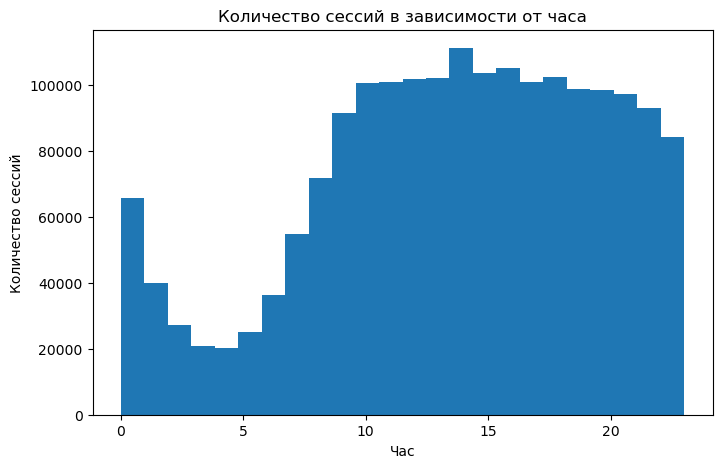

In [74]:
# Видим, что пик количества сессий наблюдается от 13 до 14 часов. Меньше всего сессий совершается в период от 4 до 5 утра
plt.figure(figsize=(8,5))
plt.hist(df_time_date.visit_hour, bins=24)
plt.xlabel('Час')
plt.ylabel('Количество сессий')
plt.title('Количество сессий в зависимости от часа');

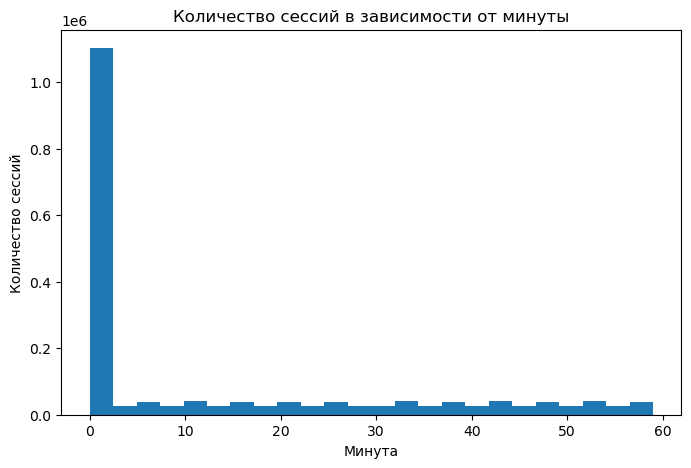

In [75]:
# Видим, что в записи минут существует выброс в районе 0. Скорее всего минуты в датафрейме записаны некорректно
plt.figure(figsize=(8,5))
plt.hist(df_time_date.visit_minute, bins=24)
plt.xlabel('Минута')
plt.ylabel('Количество сессий')
plt.title('Количество сессий в зависимости от минуты');

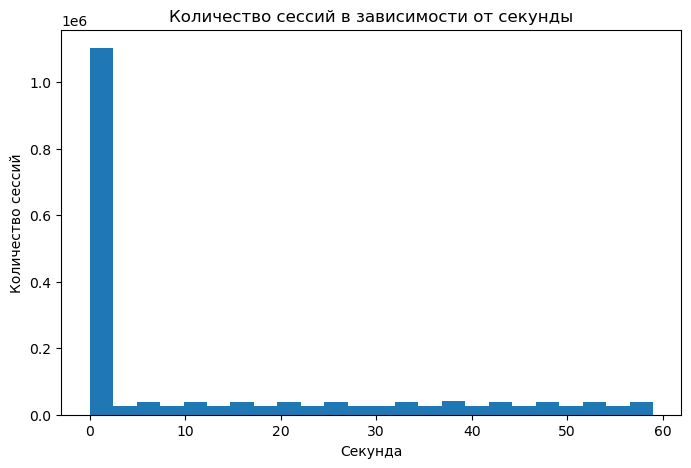

In [76]:
# В секундах та же самая картина, что и в случае с минутами. Имеет смысл оставлять в датафрейме только часы
plt.figure(figsize=(8,5))
plt.hist(df_time_date.visit_second, bins=24)
plt.xlabel('Секунда')
plt.ylabel('Количество сессий')
plt.title('Количество сессий в зависимости от секунды');

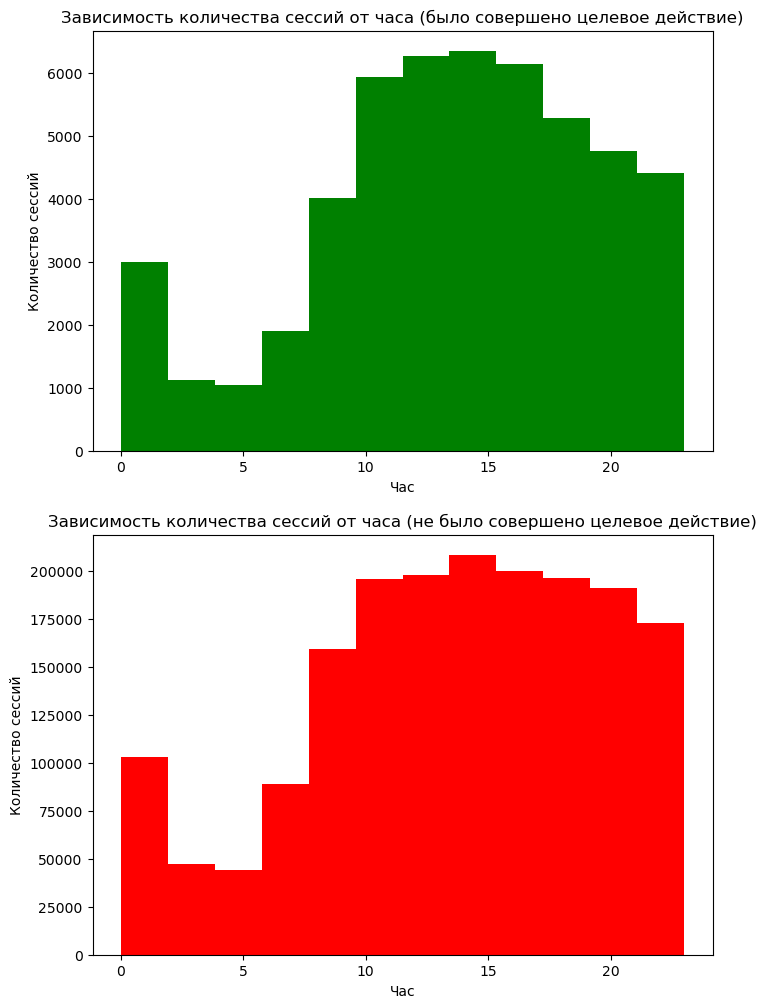

In [77]:
# Построим на одном графике количество сессий в зависимости от часа, для двух случаев - было и не было совершено целевое действие
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (8,12))
ax1.hist(df_time_date.loc[(df_time_date.target == 1), 'visit_hour'], bins = 12, color = 'green')
ax1.set_xlabel('Час')
ax1.set_ylabel('Количество сессий')
ax1.set_title('Зависимость количества сессий от часа (было совершено целевое действие)')
ax2.hist(df_time_date.loc[(df_time_date.target == 0), 'visit_hour'], bins = 12, color = 'red')
ax2.set_xlabel('Час')
ax2.set_ylabel('Количество сессий')
ax2.set_title('Зависимость количества сессий от часа (не было совершено целевое действие)');

In [78]:
# Разобьем колонку visit_date на год, месяц, день и день недели
df_time_date['visit_year'] = df_time_date.visit_date.apply(lambda x: x.year)
df_time_date['visit_month'] = df_time_date.visit_date.apply(lambda x: x.month)
df_time_date['visit_day'] = df_time_date.visit_date.apply(lambda x: x.day)
df_time_date['visit_weekday'] = df_time_date.visit_date.apply(lambda x: x.weekday())
df_time_date.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_41168\4013667567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_date['visit_year'] = df_time_date.visit_date.apply(lambda x: x.year)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_41168\4013667567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_date['visit_month'] = df_time_date.visit_date.apply(lambda x: x.month)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_41168\4013667567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

,visit_date,visit_time,target,visit_hour,visit_minute,visit_second,visit_year,visit_month,visit_day,visit_weekday
0,2021-11-24 00:00:00+00:00,14:36:32,0,14,36,32,2021,11,24,2
1,2021-11-14 00:00:00+00:00,08:21:30,0,8,21,30,2021,11,14,6
2,2021-12-28 00:00:00+00:00,02:42:06,0,2,42,6,2021,12,28,1
3,2021-05-29 00:00:00+00:00,05:00:00,0,5,0,0,2021,5,29,5
4,2021-05-29 00:00:00+00:00,05:00:00,0,5,0,0,2021,5,29,5


In [79]:
# В датафрейме использованы данные лишь за один год - 2021. Эту колонку можно удалить
df_time_date.visit_year.nunique()

1

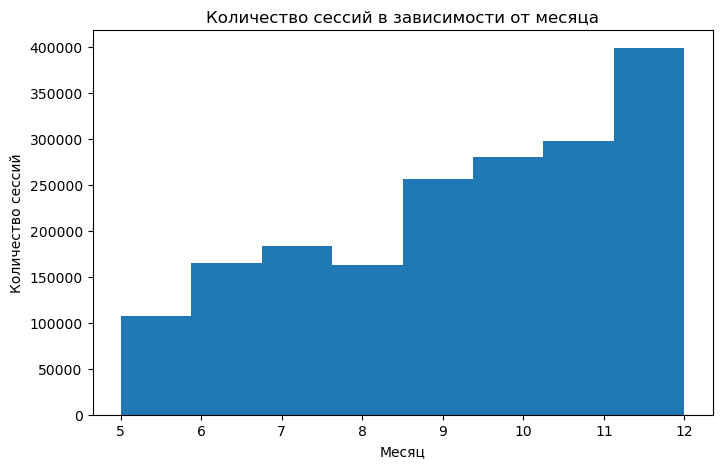

In [80]:
# Посмотрим на гистограмму по месяцам. Видно, что к концу года возрастает количество сессий
plt.figure(figsize=(8,5))
plt.hist(df_time_date.visit_month, bins=8)
plt.xlabel('Месяц')
plt.ylabel('Количество сессий')
plt.title('Количество сессий в зависимости от месяца');

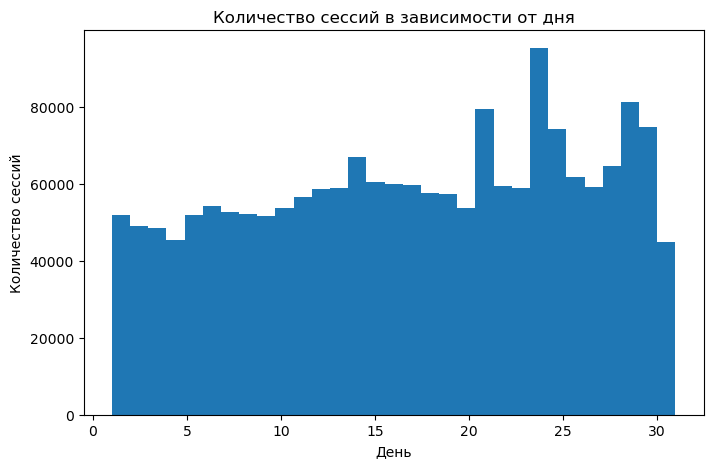

In [81]:
# Посмотрим на гистограмму по дням. Видно, что в конце месяца сессий больше
plt.figure(figsize=(8,5))
plt.hist(df_time_date.visit_day, bins=31)
plt.xlabel('День')
plt.ylabel('Количество сессий')
plt.title('Количество сессий в зависимости от дня');

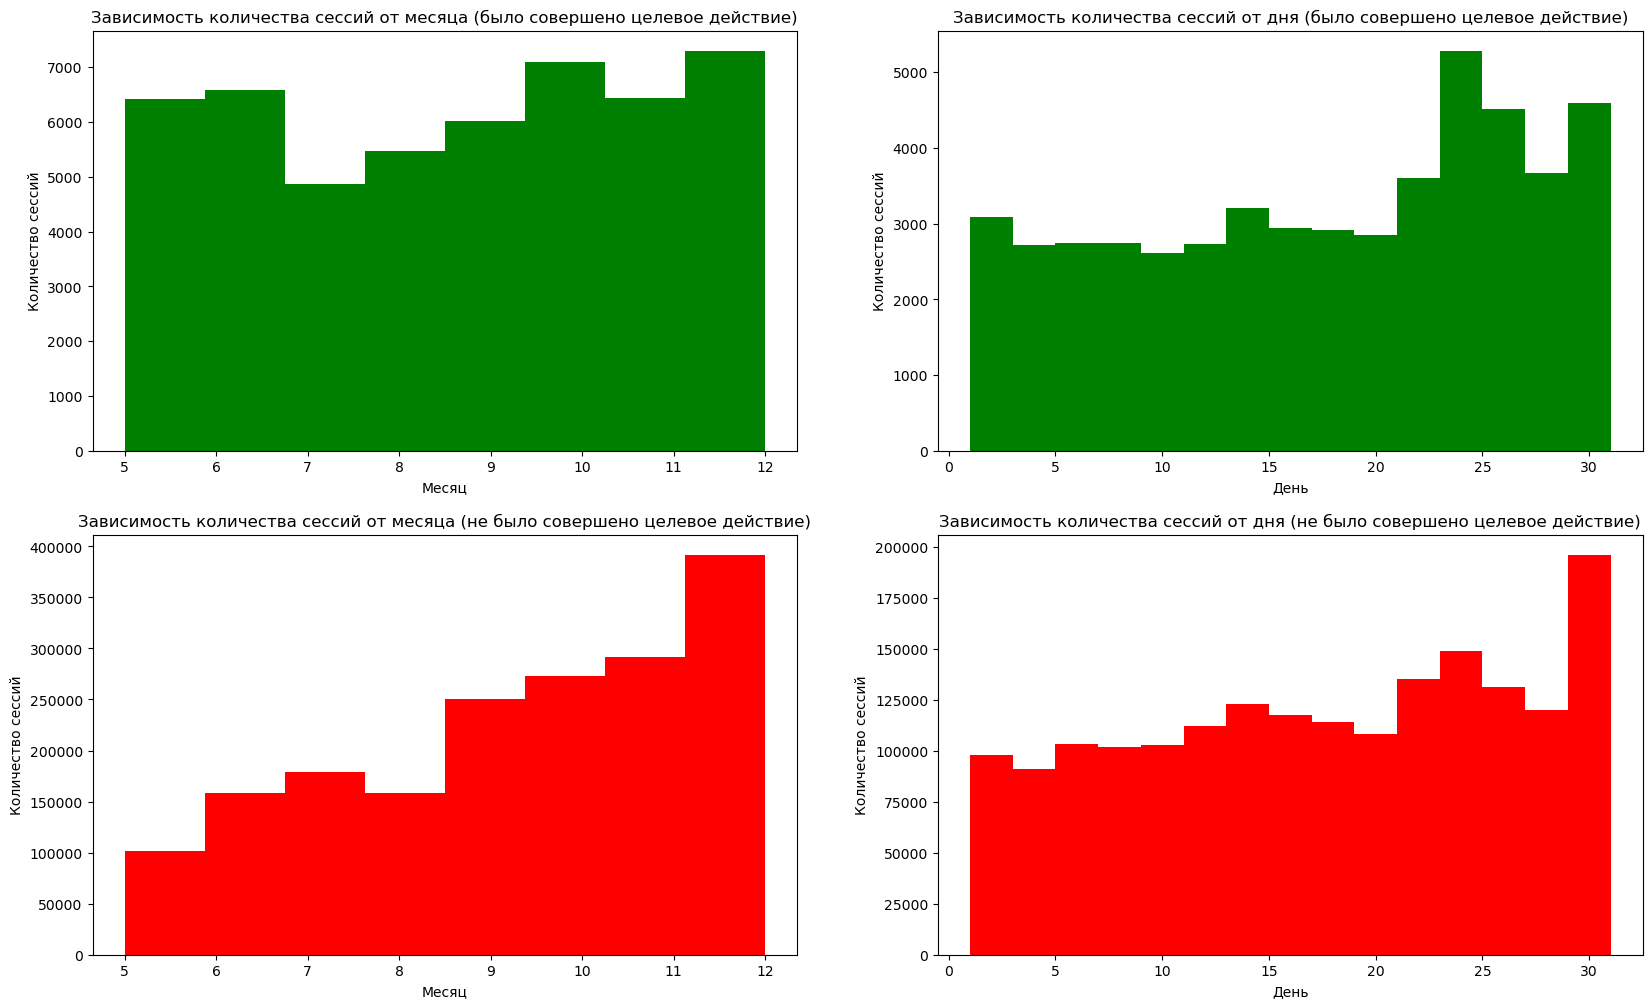

In [82]:
# Построим на одном графике количество сессий в зависимости от месяца и дня, для двух случаев - было и не было совершено целевое действие
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))
axs[0,0].hist(df_time_date.loc[(df_time_date.target == 1), 'visit_month'], bins = 8, color = 'green')
axs[0,0].set_xlabel('Месяц')
axs[0,0].set_ylabel('Количество сессий')
axs[0,0].set_title('Зависимость количества сессий от месяца (было совершено целевое действие)')
axs[1,0].hist(df_time_date.loc[(df_time_date.target == 0), 'visit_month'], bins = 8, color = 'red')
axs[1,0].set_xlabel('Месяц')
axs[1,0].set_ylabel('Количество сессий')
axs[1,0].set_title('Зависимость количества сессий от месяца (не было совершено целевое действие)')
axs[0,1].hist(df_time_date.loc[(df_time_date.target == 1), 'visit_day'], bins = 15, color = 'green')
axs[0,1].set_xlabel('День')
axs[0,1].set_ylabel('Количество сессий')
axs[0,1].set_title('Зависимость количества сессий от дня (было совершено целевое действие)')
axs[1,1].hist(df_time_date.loc[(df_time_date.target == 0), 'visit_day'], bins = 15, color = 'red')
axs[1,1].set_xlabel('День')
axs[1,1].set_ylabel('Количество сессий')
axs[1,1].set_title('Зависимость количества сессий от дня (не было совершено целевое действие)');


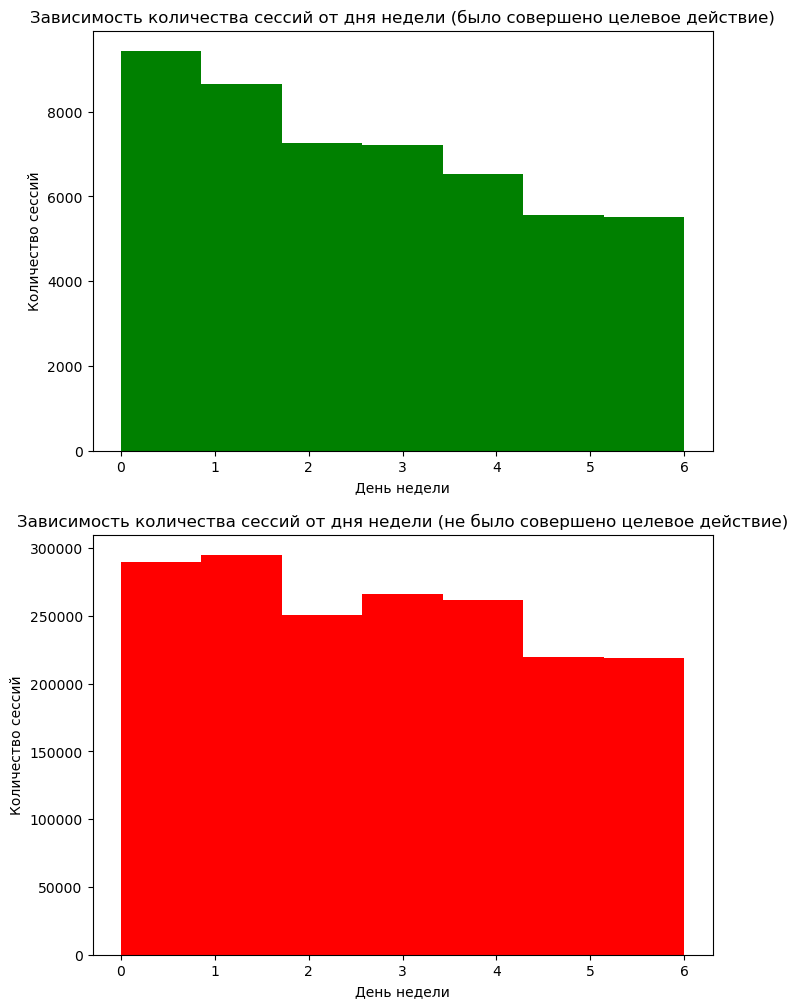

In [83]:
# Построим на одном графике количество сессий в зависимости от дня недели для двух случаев: было и не было совершено целевое действие. Видно, что в начале недели совершается больше сессий.
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (8,12))
ax1.hist(df_time_date.loc[(df_time_date.target == 1), 'visit_weekday'], bins = 7, color = 'green')
ax1.set_xlabel('День недели')
ax1.set_ylabel('Количество сессий')
ax1.set_title('Зависимость количества сессий от дня недели (было совершено целевое действие)')
ax2.hist(df_time_date.loc[(df_time_date.target == 0), 'visit_weekday'], bins = 7, color = 'red')
ax2.set_xlabel('День недели')
ax2.set_ylabel('Количество сессий')
ax2.set_title('Зависимость количества сессий от дня недели (не было совершено целевое действие)');

In [84]:
# Создадим функцию для определения времени года
def season_of_visit(month):
    if (month <= 2) | (month > 11):
        season = 'winter'
    elif (month <= 5):
        season = 'spring'
    elif (month <= 8):
        season = 'summer'
    else:
        season = 'autumn'
    return season

In [85]:
# Создадим новый признак, указывающий в какое время года была совершена сессия
df_time_date['visit_season'] = df_time_date.visit_month.apply(lambda x: season_of_visit(x))
df_time_date.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_41168\3311621299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_date['visit_season'] = df_time_date.visit_month.apply(lambda x: season_of_visit(x))


,visit_date,visit_time,target,visit_hour,visit_minute,visit_second,visit_year,visit_month,visit_day,visit_weekday,visit_season
0,2021-11-24 00:00:00+00:00,14:36:32,0,14,36,32,2021,11,24,2,autumn
1,2021-11-14 00:00:00+00:00,08:21:30,0,8,21,30,2021,11,14,6,autumn
2,2021-12-28 00:00:00+00:00,02:42:06,0,2,42,6,2021,12,28,1,winter
3,2021-05-29 00:00:00+00:00,05:00:00,0,5,0,0,2021,5,29,5,spring
4,2021-05-29 00:00:00+00:00,05:00:00,0,5,0,0,2021,5,29,5,spring


In [86]:
# Добавим в датафрейм df_feature признаки: visit_hour, visit_month, visit_day, visit_season, visit_weekday. Удалим признаки visit_date и visit_time
df_feature = df_feature.drop(['visit_date', 'visit_time'], axis = 1)
df_feature.head()

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0


In [87]:
df_feature = pd.concat([df_feature, df_time_date.loc[:, ['visit_hour', 'visit_month', 'visit_day', 'visit_season', 'visit_weekday']]], axis = 1)

In [88]:
df_feature.head()

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target,visit_hour,visit_month,visit_day,visit_season,visit_weekday
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0,14,11,24,autumn,2
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0,8,11,14,autumn,6
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,2,12,28,winter,1
3,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0,5,5,29,spring,5
4,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0,5,5,29,spring,5


#### Добавление новых фич на основе geo_city

In [89]:
df_feature.geo_city.value_counts()

Moscow              802846
Saint Petersburg    295439
(not set)            77941
Yekaterinburg        35662
Krasnodar            32158
                     ...  
Tu Son                   1
Oldbury                  1
Albion                   1
Huntley                  1
Meerut                   1
Name: geo_city, Length: 2537, dtype: int64

In [90]:
moscow_region_cities = ['Aprelevka',
 'Balashikha',
 'Bronnitsy',
 'Vereya',
 'Prominent',
 'Volokolamsk',
 'Voskresensk',
 'Vysokovsk',
 'Golitsyno',
 'Dedovsk',
 'Dzerzhinsky',
 'Dmitrov',
 'Dolgoprudny',
 'Domodedovo',
 'Drezna',
 'Dubna',
 'Egorievsk',
 'Zhukovsky',
 'Zaraisk',
 'Zvenigorod',
 'Ivanteevka',
 'Istra',
 'Kashira',
 'Wedge',
 'Kolomna',
 'Korolev',
 'Kotelniki',
 'Krasnoarmeysk',
 'Krasnogorsk',
 'Krasnozavodsk',
 'Krasnoznamensk',
 'Cuban',
 'Kurovskoe',
 'Likino-Dulyovo',
 'Lobnya',
 'Losino-Petrovsky',
 'Lukhovitsy',
 'Lytkarino',
 'Lyubertsy',
 'Mozhaysk',
 'Mytishchi',
 'Naro-Fominsk',
 'Noginsk',
 'Odintsovo',
 'Lakes',
 'Orekhovo-Zuevo',
 'Pavlovsky Posad',
 'Peresvet',
 'Podolsk',
 'Protvino',
 'Pushkino',
 'Pushchino',
 'Ramenskoe',
 'Reutov',
 'Roshal',
 'Ruza',
 'Sergiev Posad',
 'Serpukhov',
'Solnechnogorsk',
 'Old Kupavna',
 'Stupino',
 'Taldom',
 'Fryazino',
 'Khimki',
 'Khotkovo',
 'Chernogolovka',
 'Chekhov',
 'Shatura',
 'Schelkovo',
 'Elektrogorsk',
 'Elektrostal',
 'Electrocoal',
 'Yakhroma',
 'Moscow']

In [91]:
# Добавим новый признак is_Moscow_region - находится ли город близко к Москве или нет
df_feature['is_Moscow_region'] = df_feature.apply(lambda x: 1 if x.geo_city in moscow_region_cities else 0, axis = 1 )

In [92]:
# Добавим в датафрейм значения широты и долготы, для этого возьмем их значения для разных городов из csv-файла
with open ('data/coordinates_dict.pkl', 'rb') as file:
        coordinates = pickle.load(file)

In [93]:
def lat(city):
        lat = coordinates[city][0]
        return lat

In [94]:
def long(city):
        long = coordinates[city][1]
        return long


In [95]:
df_feature['lat'] = df_feature.geo_city.apply(lambda x: lat(x))
df_feature['long'] = df_feature.geo_city.apply(lambda x: long(x))

In [96]:
df_feature.head()

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,...,geo_city,target,visit_hour,visit_month,visit_day,visit_season,visit_weekday,is_Moscow_region,lat,long
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,...,Zlatoust,0,14,11,24,autumn,2,0,55.034639,59.529269
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,...,Moscow,0,8,11,14,autumn,6,1,55.625578,37.606392
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,...,Krasnoyarsk,0,2,12,28,winter,1,0,56.009097,92.872515
3,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,mobile,Android,Xiaomi,393x786,Chrome,...,Moscow,0,5,5,29,spring,5,1,55.625578,37.606392
4,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x786,Chrome,...,Moscow,0,5,5,29,spring,5,1,55.625578,37.606392


In [98]:
df_feature = df_feature.drop(['geo_city', 'geo_country'], axis=1)

In [99]:
df_feature.shape

(1852929, 19)

In [100]:
df_feature.head()

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,target,visit_hour,visit_month,visit_day,visit_season,visit_weekday,is_Moscow_region,lat,long
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,0,14,11,24,autumn,2,0,55.034639,59.529269
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,0,8,11,14,autumn,6,1,55.625578,37.606392
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,0,2,12,28,winter,1,0,56.009097,92.872515
3,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,mobile,Android,Xiaomi,393x786,Chrome,0,5,5,29,spring,5,1,55.625578,37.606392
4,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x786,Chrome,0,5,5,29,spring,5,1,55.625578,37.606392


### Удаление выбросов

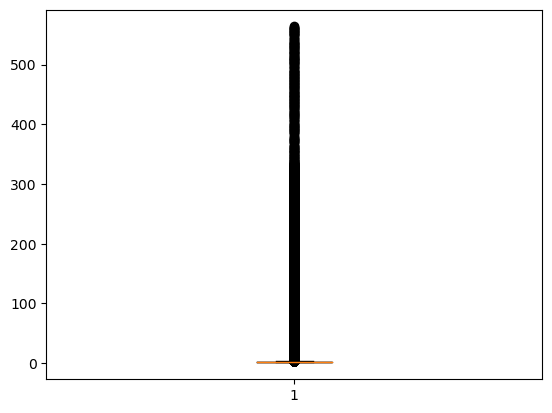

In [101]:
# Удалим выбросы в колонке visit_number. Для исследования выбросов изобразим boxplot
plt.boxplot(df_feature.visit_number);

In [102]:
# Создадим функцию для нахождения пороговых значений
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25-1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

In [103]:
# Выведем пороговые значения. Видим, что выбросы есть только в бОльшую сторону
boundaries = calculate_outliers(df_feature.visit_number)
boundaries

(-0.5, 3.5)

In [104]:
# Заменим выбросы на 3 - максимальное целое число в рамках допустимого
is_outlier = (df_feature.visit_number > boundaries[1])
df_feature.loc[is_outlier, 'visit_number'] = int(boundaries[1])

### Сохранение итогового датафрейма в файл

In [105]:
df_feature.to_csv('data/df_feature_new.csv', index = False)

# Корреляции

In [101]:
# Для изучения корреляций создадим отдельный датафрейм df_corr - копию прошлого датафрейма
df_corr = pd.read_csv('data/df_feature_new.csv')
df_corr.head()

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target,visit_hour,visit_month,visit_day,visit_season,visit_weekday,is_Moscow_region
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,other,0,14,11,24,autumn,2,0
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0,8,11,14,autumn,6,1
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,2,12,28,winter,1,0
3,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0,5,5,29,spring,5,1
4,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0,5,5,29,spring,5,1


C:\Users\lenovo\AppData\Local\Temp\ipykernel_34632\726977430.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  columns = df_corr.corr().columns.tolist()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_34632\726977430.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.imshow(df_corr.corr())


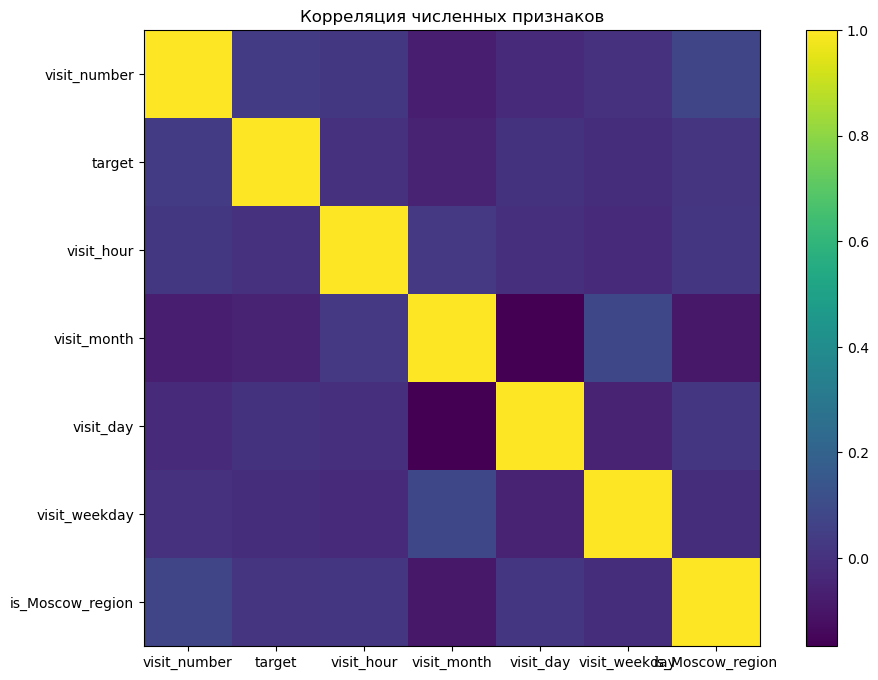

In [102]:
# Посмотрим на корреляцию численных признаков, построив heat map. Видим, что корреляция признаков отсутствует
plt.figure(figsize=(12,8))
columns = df_corr.corr().columns.tolist()
plt.imshow(df_corr.corr())

plt.title('Корреляция численных признаков')
plt.xticks(range(0, len(columns)), columns)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar();